## Task 4 - Audio - Three voice clustering

In this task, you have a folder containing 9 audio files, each associated with one of three individuals. The objective is to write a script that automatically clusters these audio files based on their corresponding voices.

In [2]:
import os
import librosa
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import json
import matplotlib.pyplot as plt

First of all, I decided to explore spectrograms. Then I began experimenting with various sound features, and the most promising options turned out to be <b>F0</b> and <b>MFCC</b>.

<b>F0</b> provides information about the pitch or fundamental frequency of a sound, while <b>MFCC</b>s capture spectral characteristics, making them valuable features for various audio analysis tasks.

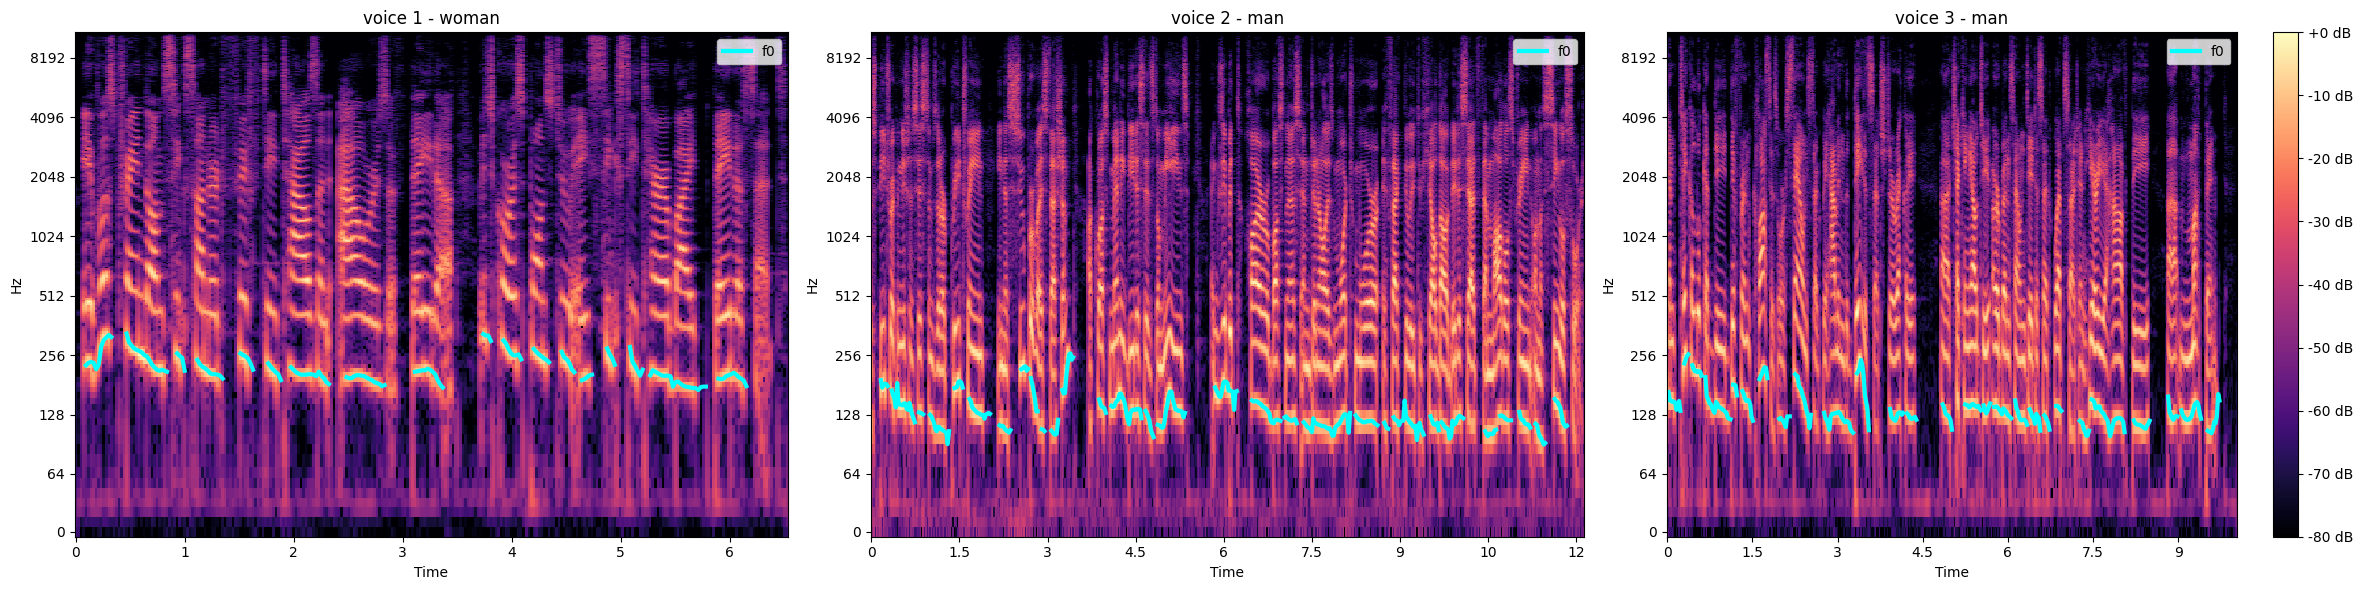

In [15]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

def plot_f0(audio_file, ax, cbar=False):
    y, sr = librosa.load(audio_file)
    
    f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
    
    times = librosa.times_like(f0)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
    if cbar:
        fig.colorbar(img, ax=ax, format="%+2.f dB")
    ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
    ax.legend(loc='upper right')

audio_files = [os.path.join("Audio - Three voice clustering", file) for file in ['1.wav', '2.wav', '4.wav']]

fig, axes = plt.subplots(1, 3, figsize=(24, 6))
for i, file in enumerate(audio_files):
    axes[0].set(title='voice 1 - woman')
    axes[1].set(title='voice 2 - man')
    axes[2].set(title='voice 3 - man')
    plot_f0(file, axes[i], True if i == 2 else False)

plt.tight_layout()
plt.show()

As we can see in these plots, the difference in hertz between female and male voices is noticeable, and even among male voices, there are distinctions. Therefore, clustering these voices with K-means should not be problematic.